In [5]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import auth
from googleapiclient.discovery import build

# Authenticate
auth.authenticate_user()

# Create Drive API service
drive_service = build('drive', 'v3')

In [7]:
# List all shared folders
results = drive_service.files().list(
    q="mimeType='application/vnd.google-apps.folder' and sharedWithMe=true",
    fields="files(id, name)").execute()

# Print folder names and IDs
for folder in results.get('files', []):
    print(f"Folder Name: {folder['name']}, Folder ID: {folder['id']}")

Folder Name: BRASA-2024-25, Folder ID: 1fxDUtS3AwmSDNgyc2BpTE3CWtshQjsSK
Folder Name: case studies (wooahh), Folder ID: 1DBni-CP87NIqscwfn_b7FmBfnprOmjJ_
Folder Name: Y2S2 ECE, Folder ID: 1Ge6Ua1xQAXrI-N9HSj7k9Qj5lwY-fERp
Folder Name: Formulários apartamento, Folder ID: 1ZVFlBthf11qZ760XKNzac9BWtgAZgBYy
Folder Name: ECE231-Tutorial-Notes, Folder ID: 1jS73Tx6WPb6FEAWGoQD5FAWM4VP0bBJg
Folder Name: First Year, Folder ID: 14paejQPp9wmwzW-UFxtoj9-HEUnRbAJ6
Folder Name: 🎬 VÍDEOS E PALESTRAS, Folder ID: 1cX7UnZeHykgOTieWZDQ2cagc3Y6yKVd_
Folder Name: 2019_1, Folder ID: 1JE4bmgF9YcMfEUxivvn0jKfe4vV1onFe
Folder Name: LogicaParaComputacao_novo, Folder ID: 1UccpILTFLBZjeGzatpW41q2C0rbYQjiZ
Folder Name: apstilas, Folder ID: 1CeE0k6sB-CDYqvivKqPb9Ithl7_-Z7kp
Folder Name: Guias Europa 2021, Folder ID: 1cZXaBk2XauGh46t4AAeWAJ2n8nkrohut
Folder Name: Apostilas Bernoulli (Matemática), Folder ID: 1LFloA8TanOlrruZ_5ZvKFXXMfZHRjT3R
Folder Name: Second Year, Folder ID: 1ZNyPNW0mfsx7uOXT0T6AFUmUhCISy31K
Folde

In [7]:
# Replace with your actual Folder ID from the previous step
folder_id = "1fxDUtS3AwmSDNgyc2BpTE3CWtshQjsSK"

# List all files in the folder
results = drive_service.files().list(
    q=f"'{folder_id}' in parents",
    fields="files(id, name)").execute()

# Print file names and IDs
for file in results.get('files', []):
    print(f"File Name: {file['name']}, File ID: {file['id']}")



File Name:  Brasa UTSC Elections - Fall 2024, File ID: 11e_uHiY1EsY7WU9RcvP_ImQ_d4XtcD1BdOPwm83WH0w
File Name: Projects, File ID: 1k6ZIa0_sVMr0l13jNsfQHGLJcWBlGqbN
File Name: Untitled document, File ID: 1hEMvGi6Jxb3UpCk8Kwio8eM_Dbm0gk6osvu8ZT_9Nds
File Name: First Year Officer Stuff, File ID: 1fuglOWGze_wQfycvbwQ7TEUMPQLpfWf5
File Name: Executives information, File ID: 1j2YuxxeIddZRHnXQgUHygQMzhbnIWCTF
File Name: Events Planning, File ID: 1kzyrzCnumHBlFnTF8nWLYKLzPbS9knv2
File Name: Meeting minutes, File ID: 1JtccR4jGQnoeQnIwEnmorx4nByFa2N4k
File Name: Graphics and Logos, File ID: 1W1LeAPQO4TOWF8HhU7eJ1bClJlQmblJi


In [8]:
# Replace with your actual Folder ID from the previous step
folder_id = "1k6ZIa0_sVMr0l13jNsfQHGLJcWBlGqbN"

# List all files in the folder
results = drive_service.files().list(
    q=f"'{folder_id}' in parents",
    fields="files(id, name)").execute()

# Print file names and IDs
for file in results.get('files', []):
    print(f"File Name: {file['name']}, File ID: {file['id']}")

File Name: Members' Form and Database, File ID: 1wQvn5G33Ho-S0_8qt0o1ci4miV-bNF0N


In [8]:
# Replace with your actual Folder ID from the previous step
folder_id = "1wQvn5G33Ho-S0_8qt0o1ci4miV-bNF0N"

# List all files in the folder
results = drive_service.files().list(
    q=f"'{folder_id}' in parents",
    fields="files(id, name)").execute()

# Print file names and IDs
for file in results.get('files', []):
    print(f"File Name: {file['name']}, File ID: {file['id']}")

File Name: MembersAnalysis, File ID: 1mrjWoO_q4HjHMC2QpPh6ngm-rWNx1g6B
File Name: List-of-Members, File ID: 1YUVTrYuBMg8pyzU0QK1jRdrBre5bLDCrR4AQRACtAOk
File Name: Registration Form, File ID: 1WoC5o6gLydfp2MgAKIMicw2TofZaZe_jVzDPXBUvLr0


In [9]:
file_id = "1YUVTrYuBMg8pyzU0QK1jRdrBre5bLDCrR4AQRACtAOk"  # Replace with actual File ID
file_name = "List-of-Members.xlsx"

import requests

# Download the file
download_url = f"https://drive.google.com/uc?id={file_id}"
response = requests.get(download_url)

# Save to Colab
with open(file_name, "wb") as f:
    f.write(response.content)

In [10]:
import io
from googleapiclient.http import MediaIoBaseDownload

# Correct way to download files from Google Drive
request = drive_service.files().export_media(fileId=file_id, mimeType='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')
file = io.BytesIO()
downloader = MediaIoBaseDownload(file, request)

done = False
while not done:
    status, done = downloader.next_chunk()

# Save it correctly
with open(file_name, "wb") as f:
    f.write(file.getbuffer())

print(f"Downloaded {file_name} successfully!")

Downloaded List-of-Members.xlsx successfully!


In [11]:
import pandas as pd

data = pd.read_excel("List-of-Members.xlsx", engine="openpyxl")
data.to_csv("List-of-Members.csv", index=False)

# Display first few rows
data.head()

,Timestamp,Full name,Student Number,Undergrad or grad student?,Faculty,Year of study,Campus,UofT email
0,2025-01-29 00:26:24.370,Gaio Santos,1008948123,Undergrad,Engineering,3rd year,UTSG,gaio.santos@mail.utoronto.ca
1,2025-01-28 20:42:02.825,Laura Vasco de Paula Ferreira,1008965274,Undergrad,Arts & Sciences,3rd year,UTSG,laura.ferreira@mail.utoronto.ca
2,2025-01-28 20:42:06.295,Luisa Naomi Gerhard,1008953223,Undergrad,Arts & Sciences,3rd year,UTSG,luisa.gerhard@mail.utoronto.ca
3,2025-01-28 20:42:13.612,Maria Eduarda Fonseca Carvalho,1008969939,Undergrad,Arts & Sciences,3rd year,UTSG,duda.fonseca@mail.utoronto.ca
4,2025-01-30 10:41:57.132,Arthur Marins de Oliveira,1011007553,Undergrad,Arts & Sciences,1st year,UTSG,arthur.marinsdeoliveira@mail.utoronto.ca


In [12]:
print(data.columns)

Index(['Timestamp', 'Full name', 'Student Number',
       'Undergrad or grad student?', 'Faculty', 'Year of study', 'Campus',
       'UofT email'],
      dtype='object')


In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# undergraduate vs graduate data
undergrads = data[data["Undergrad or grad student?"] == "Undergrad"]
grads = data[data["Undergrad or grad student?"] == "Grad Student"]
grad_distribution = [len(undergrads), len(grads)]

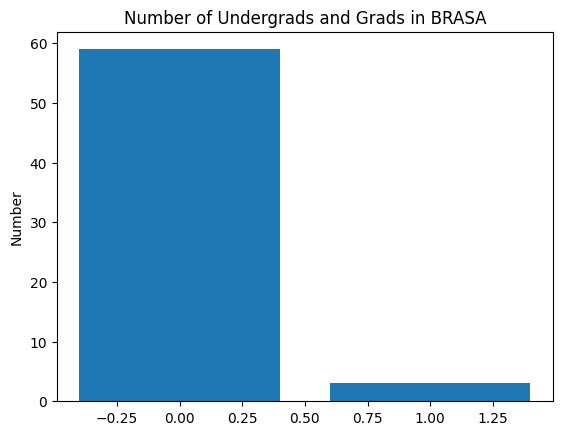

In [27]:
# grad vs undergrad
pos = [0, 1]

plt.bar(pos, grad_distribution, align='center')
plt.xticks = (pos,['undergrads', 'grads'])
plt.title('Number of Undergrads and Grads in BRASA')
plt.ylabel("Number")
plt.show()


In [ ]:
# Pie chart for majors
